# DATA Science IOT FUndamentals


## 📌 Binning and Identifying Outliers in Pandas

When working with datasets, we often need to categorize continuous numerical data into discrete bins (binning) and detect unusual data points (outliers) that might distort our analysis.

These techniques help in data preprocessing, feature engineering, and exploratory data analysis (EDA).

🔹 1️⃣ Binning in Pandas

📖 What is Binning?
Binning is the process of grouping continuous numerical values into discrete categories or bins.

It is useful when we want to:

Simplify data by reducing its granularity.

Make patterns more visible by grouping similar values.

Improve machine learning models by handling continuous variables as categorical features.

Binning can be done in equal-width bins (where all bins have the same range) or equal-frequency bins (where each bin contains approximately the same number of data points).

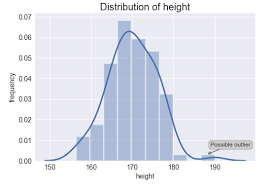

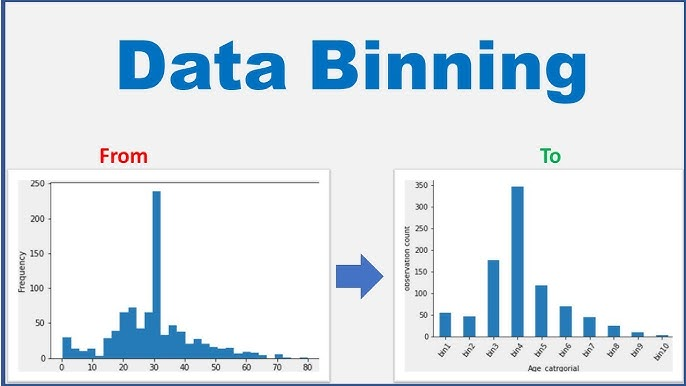

📌 Example 1: Equal-Width Binning for Age Groups
Let's categorize ages into different groups like Young, Adult, Senior using equal-width binning.

💡 Why Use This?
✅ Makes continuous data more interpretable.
✅ Useful in customer segmentation (e.g., age groups in marketing).




In [ ]:
import pandas as pd
import numpy as np

# Creating a dataset
df = pd.DataFrame({
    'Name': ['John', 'Alice', 'Robert', 'Maya', 'David', 'Sara'],
    'Age': [18, 25, 45, 60, 75, 30]
})

# Defining bin edges
bins = [0, 20, 40, 60, 80]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']

# Binning Age column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df

,Name,Age,Age Group
0,John,18,Teen
1,Alice,25,Young Adult
2,Robert,45,Adult
3,Maya,60,Adult
4,David,75,Senior
5,Sara,30,Young Adult


📌 Example 2: Equal-Frequency Binning for Salaries
In this method, each bin contains approximately the same number of data points.


💡 Why Use This?

✅ Ensures balanced bins even if data distribution is uneven.



In [ ]:
df = pd.DataFrame({
    'Employee': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Salary': [30000, 50000, 70000, 90000, 110000, 130000]
})

# Binning into 3 groups of equal frequency
df['Salary Category'] = pd.qcut(df['Salary'], q=3, labels=['Low', 'Medium', 'High'])

df

,Employee,Salary,Salary Category
0,A,30000,Low
1,B,50000,Low
2,C,70000,Medium
3,D,90000,Medium
4,E,110000,High
5,F,130000,High


📌 Example 3: Custom Binning for Student Scores
We can manually define bins for grading students.


💡 Why Use This?

✅ Standardizes grading systems for performance analysis.

In [ ]:
df = pd.DataFrame({
    'Student': ['Amit', 'Neha', 'Rohan', 'Sara', 'Vikas', 'Priya'],
    'Marks': [35, 75, 90, 60, 85, 40]
})

# Defining bin edges and labels
bins = [0, 40, 60, 80, 100]
labels = ['Fail', 'Pass', 'Good', 'Excellent']

df['Grade'] = pd.cut(df['Marks'], bins=bins, labels=labels)
df

,Student,Marks,Grade
0,Amit,35,Fail
1,Neha,75,Good
2,Rohan,90,Excellent
3,Sara,60,Pass
4,Vikas,85,Excellent
5,Priya,40,Fail


📌 Example 4: Binning Population Density

We can categorize cities based on their population density.


💡 Why Use This?
✅ Helps in urban planning and resource allocation.


In [ ]:
df = pd.DataFrame({
    'City': ['Mumbai', 'New York', 'Tokyo', 'Sydney', 'Berlin'],
    'Density': [20000, 11000, 15000, 4000, 5000]  # People per sq km
})

# Defining density categories
bins = [0, 5000, 15000, 25000]
labels = ['Low', 'Medium', 'High']

df['Density Level'] = pd.cut(df['Density'], bins=bins, labels=labels)

df


,City,Density,Density Level
0,Mumbai,20000,High
1,New York,11000,Medium
2,Tokyo,15000,Medium
3,Sydney,4000,Low
4,Berlin,5000,Low


📌 Example 5: Binning House Prices into Affordable Ranges

💡 Why Use This?
✅ Makes housing data more interpretable for buyers.



In [ ]:
df = pd.DataFrame({
    'House': ['A', 'B', 'C', 'D', 'E'],
    'Price': [150000, 300000, 450000, 600000, 750000]
})

# Defining price categories
bins = [0, 250000, 500000, 1000000]
labels = ['Low', 'Medium', 'High']

df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

df

,House,Price,Price Range
0,A,150000,Low
1,B,300000,Medium
2,C,450000,Medium
3,D,600000,High
4,E,750000,High


🔹 2️⃣ Identifying Outliers in Pandas

📖 What are Outliers?

Outliers are data points that significantly differ from the rest of the dataset. These values may be due to errors, unusual events, or true variations in the data.

Common Techniques to Identify Outliers:

Using the Interquartile Range (IQR) – Values outside 1.5 times the IQR are outliers.

Using Z-score – Values with a Z-score above 3 or below -3 are outliers.

📌 Example 1: Detecting Outliers Using IQR

💡 Why Use This?
✅ Robust against extreme values in skewed data.



In [ ]:
df = pd.DataFrame({'Sales': [100, 120, 130, 125, 500, 140, 135, 2000]})

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
df['Outlier'] = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

print(df)

   Sales  Outlier
0    100    False
1    120    False
2    130    False
3    125    False
4    500     True
5    140    False
6    135    False
7   2000     True


📌 Example 2: Detecting Outliers Using Z-score

💡 Why Use This?
✅ Best for normal distributions.



In [ ]:
from scipy import stats

df = pd.DataFrame({'Height': [150, 160, 170, 165, 155, 180, 190, 300]})

# Computing Z-score
df['Z-Score'] = np.abs(stats.zscore(df['Height']))

# Flagging outliers
df['Outlier'] = df['Z-Score'] > 3

df

,Height,Z-Score,Outlier
0,150,0.740073,False
1,160,0.520792,False
2,170,0.301511,False
3,165,0.411152,False
4,155,0.630433,False
5,180,0.082230,False
6,190,0.137051,False
7,300,2.549141,False


📌 Example 3: Replacing Outliers with Median

💡 Why Use This?
✅ Preserves data integrity without deleting rows.




In [ ]:
df = pd.DataFrame({'Temperature': [25, 26, 30, 27, 29, 50]})

# Using IQR method
Q1, Q3 = df['Temperature'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Replacing outliers with median
median_value = df['Temperature'].median()
df.loc[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound), 'Temperature'] = median_value
df

,Temperature
0,25
1,26
2,30
3,27
4,29
5,28


📌 Example 4: Identifying Outliers in a Salary Dataset

💡 Why Use This?
✅ Helps in detecting fraud or reporting errors.



In [ ]:
df = pd.DataFrame({'Salary': [40000, 50000, 60000, 70000, 800000]})

# Finding outliers using IQR
Q1, Q3 = df['Salary'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]

df

,Salary
0,40000
1,50000
2,60000
3,70000
4,800000


📌 Example 5: Visualizing Outliers Using Boxplot

💡 Why Use This?
✅ Quickly spots outliers in large datasets.

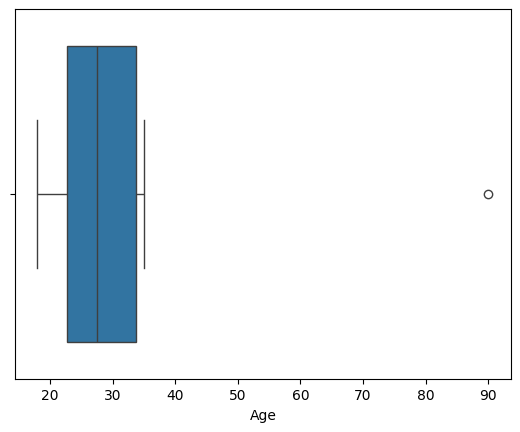

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Age': [18, 22, 25, 30, 35, 90]})

# Plotting boxplot
sns.boxplot(x=df['Age'])
plt.show()


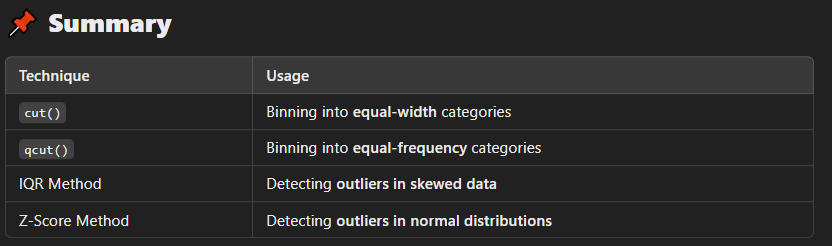

## 📌 Time Series Analysis: Basic Operations in Pandas

📖 What is Time Series Analysis?

Time series data is a sequence of data points recorded over time at regular intervals.

Examples include stock prices, weather data, sales trends, and sensor readings.

In Pandas, time series analysis involves:

Handling datetime data

Resampling & frequency conversion

Rolling window operations (moving averages, trends)

Lagging and differencing

Handling missing time data

Time series analysis is widely used in finance, forecasting, and IoT analytics.

🔹 1️⃣ Working with DateTime in Pandas

📖 What is DateTime Handling?

Before performing time-based analysis, we need to ensure our date column is in datetime format.

Pandas provides:

pd.to_datetime() – Converts text dates to datetime format.
dt accessor – Extracts year, month, day, weekday, etc.


📌 Example 1: Converting a Column to DateTime Format
We have a dataset of daily sales stored as strings. We need to convert it to datetime format.

💡 Why Use This?
✅ Required for sorting, filtering, and grouping time-based data.

In [ ]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'Date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'],
    'Sales': [100, 150, 200, 130]
})

# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()


print(df)

        Date  Sales  Year  Month    Weekday
0 2024-01-01    100  2024      1     Monday
1 2024-01-02    150  2024      1    Tuesday
2 2024-01-03    200  2024      1  Wednesday
3 2024-01-04    130  2024      1   Thursday


🔹 2️⃣ Resampling and Frequency Conversion

📖 What is Resampling?

Resampling allows us to change the frequency of time-series data (e.g., daily data to weekly/monthly).

Common resampling methods:

.resample('M') → Resample to monthly frequency

.resample('W') → Resample to weekly frequency

.resample('Q') → Resample to quarterly frequency





📌 Example 3: Resampling Daily Sales Data to Monthly Sales
We want to convert daily sales data into monthly totals.

💡 Why Use This?
✅ Helps in business reporting (monthly sales analysis).

In [ ]:
# Resampling daily sales data to monthly
monthly_sales = df.resample('M', on='Date')['Sales'].sum()

print(monthly_sales)

Date
2024-01-31    580
Freq: ME, Name: Sales, dtype: int64


<ipython-input-75-b97af29ab951>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales'].sum()


📌 Example 4: Resampling to Weekly Average Sales
We need to convert daily sales into weekly averages.


💡 Why Use This?
✅ Useful for tracking trends in sales or user activity.

In [ ]:
# Resampling daily sales data to weekly
weekly_sales = df.resample('W', on='Date')['Sales'].mean()

print(weekly_sales)

Date
2024-01-07    145.0
Freq: W-SUN, Name: Sales, dtype: float64


🔹 3️⃣ Moving Averages & Rolling Windows

📖 What is a Rolling Window?

A rolling window helps smooth fluctuations in time series data by computing statistics over a fixed period.

Common rolling operations:

.rolling(window=3).mean() → 3-day moving average

.rolling(window=7).sum() → 7-day cumulative total


📌 Example 5: Calculating a 3-Day Moving Average of Sales
We want to analyze the trend of sales over time using a moving average.

💡 Why Use This?
✅ Helps in detecting trends and smoothing short-term fluctuations.



In [ ]:
# Calculate 3-day moving average
df['3-day Moving Avg'] = df['Sales'].rolling(window=3).mean()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg
0 2024-01-01    100  2024      1     Monday               NaN
1 2024-01-02    150  2024      1    Tuesday               NaN
2 2024-01-03    200  2024      1  Wednesday             150.0
3 2024-01-04    130  2024      1   Thursday             160.0


📌 Example 6: 7-Day Cumulative Sales Sum
We want to track the total sales for the past 7 days.

💡 Why Use This?
✅ Used in tracking revenue over a specific time window.



In [ ]:
# 7-day cumulative sum
df['7-day Cumulative Sales'] = df['Sales'].rolling(window=7).sum()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  


🔹 4️⃣ Lagging and Differencing

📖 What is Lagging & Differencing?

Lagging shifts data to compare current vs. past values.
Differencing calculates the change between consecutive values to remove trends.




📌 Example 7: Lagging Sales by 1 Day
We compare current sales with previous day's sales.

💡 Why Use This?
✅ Helps in predicting future trends based on past data.




In [ ]:
# Lagging sales by 1 day
df['Previous Day Sales'] = df['Sales'].shift(1)

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  
0                     NaN                 NaN  
1                     NaN               100.0  
2                     NaN               150.0  
3                     NaN               200.0  


📌 Example 8: Calculating the Daily Change in Sales
We want to measure daily sales fluctuations.

💡 Why Use This?

✅ Used in stock price analysis, economic forecasting.



In [ ]:
# Differencing to calculate daily change
df['Sales Change'] = df['Sales'].diff()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  Sales Change  
0                     NaN                 NaN           NaN  
1                     NaN               100.0          50.0  
2                     NaN               150.0          50.0  
3                     NaN               200.0         -70.0  


🔹 5️⃣ Handling Missing Time Series Data

📖 What if Some Dates Are Missing?

Missing values can occur when data is not recorded every day.
Pandas allows:

Forward fill (ffill()) → Fill missing values with the last known value.

Backward fill (bfill()) → Fill missing values with the next known value.

Interpolation → Estimates missing values based on surrounding values.

📌 Example 9: Filling Missing Dates Using Forward Fill
We have a dataset where some dates are missing.

💡 Why Use This?
✅ Prevents data loss when performing time-based analysis.


In [ ]:
# Fill missing values with forward fill
df['Sales'] = df['Sales'].fillna(method='ffill')

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  Sales Change  
0                     NaN                 NaN           NaN  
1                     NaN               100.0          50.0  
2                     NaN               150.0          50.0  
3                     NaN               200.0         -70.0  


<ipython-input-81-40628e69bd5d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sales'] = df['Sales'].fillna(method='ffill')


📌 Example 10: Interpolating Missing Values
We want to estimate missing sales values.

💡 Why Use This?
✅ Useful in sensor data analysis, stock market data.



In [ ]:
# Interpolate missing values
df['Sales'] = df['Sales'].interpolate()

print(df)

        Date  Sales  Year  Month    Weekday  3-day Moving Avg  \
0 2024-01-01    100  2024      1     Monday               NaN   
1 2024-01-02    150  2024      1    Tuesday               NaN   
2 2024-01-03    200  2024      1  Wednesday             150.0   
3 2024-01-04    130  2024      1   Thursday             160.0   

   7-day Cumulative Sales  Previous Day Sales  Sales Change  
0                     NaN                 NaN           NaN  
1                     NaN               100.0          50.0  
2                     NaN               150.0          50.0  
3                     NaN               200.0         -70.0  


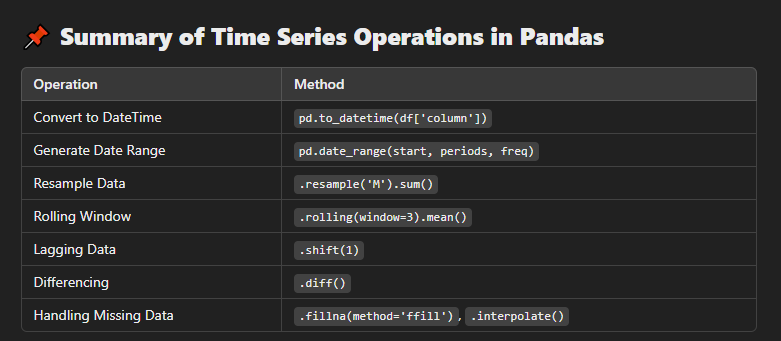

## 📌 SCIKIT LEARN + HISTOGRAMS + LINEAR + LOGISTIC  COMPLETE NOTEBOOK

CLICK HERE TO ACCESS :

https://colab.research.google.com/drive/146wyXkJuDt1oxc8DFj06DKeqssxscWyC?usp=sharing